In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.display import display, HTML
import datetime

%matplotlib inline
plt.rcParams.update({'xtick.direction': 'out', 'axes.spines.top': False, 'axes.spines.right': False})

df1 = pd.read_csv('dataverse_files/main_data.tab', sep="\t")
df1 = df1.dropna(axis=0, subset='time')
df1.filter(regex='\w*simple\w*')

,matched_simple
59,NaN
60,NaN
61,NaN
62,NaN
63,NaN
...,...
133635,NaN
133636,NaN
133637,NaN
133638,NaN


In [16]:
model = smf.ols('lnrepression ~ C(hostcity)*time + lnpop_1970 + literacy_avg + lnrebact1974 +\
                    lnrepression70_77 + C(zone2) + C(zone3) + C(zone4) + C(zone5)', data=df1)\
                .fit(cov_type='HC1')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     16.38
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           1.07e-32
Time:                        01:40:09   Log-Likelihood:                 86828.
No. Observations:               56394   AIC:                        -1.736e+05
Df Residuals:                   56382   BIC:                        -1.735e+05
Df Model:                          11                                         
Covariance Type:                  HC1                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.0034      0.002     -1.544      0.122      -0.008       0.001
C(hostcity)[T.1.0]          0.0715      0.021      3.398      0.001       0.030       0.113
C(zone2)[T.1]              -0.0147      0.002     -9.544      0.000      -0.018      -0.012
C(zone3)[T.1]              -0.0116      0.001     -8.930      0.000      -0.014      -0.009
C(zone4)[T.1]              -0.0082      0.004     -2.170      0.030      -0.016      -0.001
C(zone5)[T.1]              -0.0093      0.001     -9.227      0.000      -0.011      -0.007
time                       -0.0005      0.001     -0.879      0.379      -0.002       0.001
C(hostcity)[T.1.0]:time     0.0202      0.032      0.638      0.523      -0.042       0.082
lnpop_1970                  0.0033      0.000      7.862      0.000       0.002       0.004
literacy_avg               -0.0237      0.003     -9.274      0.000      -0.029      -0.019
lnrebact1974               -0.0014      0.000     -6.984      0.000      -0.002      -0.001
lnrepression70_77           0.0032      0.000      8.070      0.000       0.002       0.004
==============================================================================
Omnibus:                   120088.603   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        467619942.279
Skew:                          19.009   Prob(JB):                         0.00
Kurtosis:                     447.481   Cond. No.                         350.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [3]:
p = model.fittedvalues.to_frame().reset_index()
df1 = df1.reset_index()
df1 = pd.merge(left=df1, right=p, on='index')
df1 = df1.rename(columns={0: 'fit'})

In [17]:
df1

,index,muni,id,prov,id_prov,muniprov,repression,lnrepression,dumrepression,hostcity,...,subzone16,subzone17,subzone18,matched_simple,matched_allhosts,matched_nocapfed,fit,Dates,eventx,event
0,59,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,...,0,0,0,NaN,NaN,NaN,-0.002872,1978-03-01,0,0.00
1,60,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,...,0,0,0,NaN,NaN,NaN,-0.002877,1978-03-02,0,0.00
2,61,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,...,0,0,0,NaN,NaN,NaN,-0.002881,1978-03-03,0,0.00
3,62,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,...,0,0,0,NaN,NaN,NaN,-0.002886,1978-03-04,0,0.00
4,63,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,...,0,0,0,NaN,NaN,NaN,-0.002891,1978-03-05,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56389,133367,trancas,498.0,tucuman,24.0,trancas tucuman,0.0,0.0,0.0,0.0,...,0,0,0,NaN,NaN,NaN,-0.006878,1978-06-21,21,0.51
56390,133368,trancas,498.0,tucuman,24.0,trancas tucuman,0.0,0.0,0.0,0.0,...,0,0,0,NaN,NaN,NaN,-0.006883,1978-06-22,22,0.51
56391,133369,trancas,498.0,tucuman,24.0,trancas tucuman,0.0,0.0,0.0,0.0,...,0,0,0,NaN,NaN,NaN,-0.006888,1978-06-23,23,0.51
56392,133370,trancas,498.0,tucuman,24.0,trancas tucuman,0.0,0.0,0.0,0.0,...,0,0,0,NaN,NaN,NaN,-0.006893,1978-06-24,24,0.51


In [5]:
base = datetime.datetime(1978, 2, 28)
date_dict = {x/100: base + datetime.timedelta(days=x) for x in range(1, 118)}
df1['Dates'] = df1['time'].map(date_dict)
df1['eventx'] = np.where(df1['Dates'].dt.month == 6, df1['Dates'].dt.day, 0)
df1['event'] = np.where(df1['eventx'] == 0, 0, 0.51)

In [6]:
host = df1.loc[df1['hostcity'] == 1.0]
no_host = df1.loc[(df1['hostcity'] != 1.0) | (df1['hostcity'] == np.nan)]
#host

In [7]:
#no_host

In [8]:
model.fittedvalues

59       -0.002872
60       -0.002877
61       -0.002881
62       -0.002886
63       -0.002891
            ...   
133367   -0.006878
133368   -0.006883
133369   -0.006888
133370   -0.006893
133371   -0.006898
Length: 56394, dtype: float64

In [9]:
# host = host.loc[host['repression'] != 0.0]
# host = host.groupby(by='Dates').max()


<AxesSubplot: xlabel='time', ylabel='fit'>

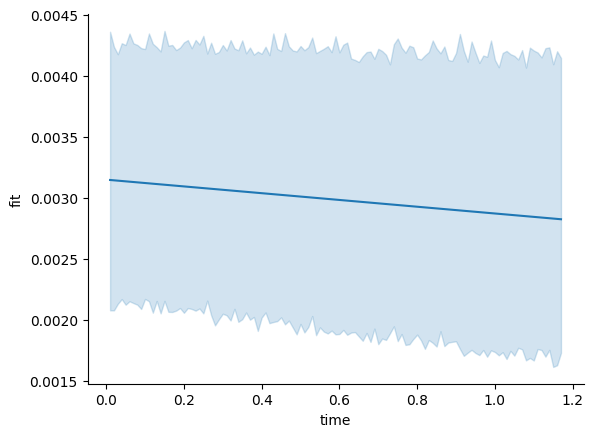

In [10]:
sns.lineplot(data=df1, x='time', y='fit')

In [65]:
d = host.groupby(by=[host['Dates'].dt.month, host['Dates'].dt.day]).max()
d = d.rename_axis(['months', 'days'])
d.loc[:, ('monht', )]


SyntaxError: invalid syntax (2837693699.py, line 3)

<AxesSubplot: xlabel='time', ylabel='fit'>

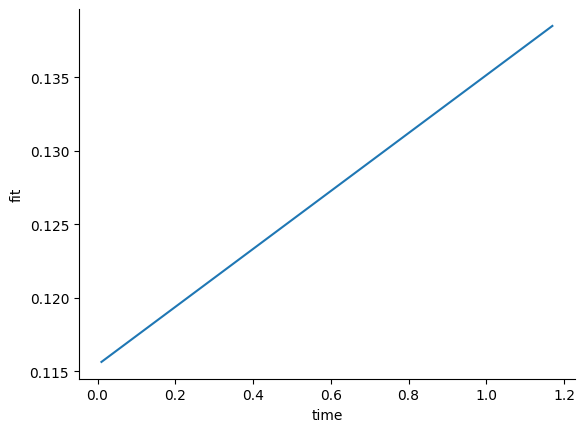

In [59]:
sns.lineplot(data=d.loc[:, d], x='time', y='fit')

<AxesSubplot: xlabel='time', ylabel='fit'>

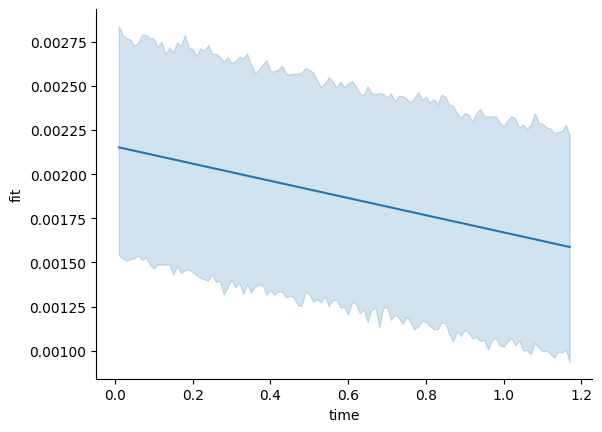

In [12]:
sns.lineplot(data=no_host, x='time', y='fit')